## **ST3: Mapas de calor y boxplots**


### **Parte 1: Selección, limpieza y preparación de los Datos en Python**

In [ ]:
import pandas as pd

**Selección de datos**

In [ ]:
datos_spoti = pd.read_csv("songs_normalize.csv") # campos: artist, song, duration_ms, explicit, year, popularity, danceability, energy, key, loudness, mode, speechiness,acousticness, instrumentaliness, liveness, valence, tempo, genre

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Selección de los datos**

Utilizaremos únicamente los siguientes datos en nuestro análisis
*   Artist
*   Song
*   Year
*   Popularity
*   Genre

In [12]:
artist = datos_spoti['artist']
song = datos_spoti['song']
year = datos_spoti['year']
popularity = datos_spoti['popularity']
genre = datos_spoti['genre']
energy  = datos_spoti['energy']
dance  = datos_spoti['danceability']

spoti = {
    "artist": artist,
    "song": song,
    "year": year,
    "popularity": popularity,
    "genre": genre,
    "energy": energy,
    "dance": dance
}
spoti = pd.DataFrame(spoti)
spoti

spotinum = {
    "popularity": popularity,
    "energy": energy,
    "dance": dance
}
spotinum = pd.DataFrame(spotinum)

ed = {
    "energy": energy,
    "dance": dance
}
ed = pd.DataFrame(ed)



**Limpieza de los datos**

In [13]:
spoti.isnull().values.any() #Si imprime "false" es porque todos los valores son válidos

dataset = spoti.dropna() # creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

dataset.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

# Como da 0 en cada columna, podemos avanzar.

artist        0
song          0
year          0
popularity    0
genre         0
energy        0
dance         0
dtype: int64

**Preparación de datos**

In [15]:
dataset.columns
x = dataset[['year']].values
y = dataset['dance'].values

In [16]:
x1 = dataset['dance']
y1 = dataset[['energy']]


In [17]:
x2 = dataset['genre']
y2 = dataset[['popularity']]

In [18]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prueba

### **Parte 2: Preparación de los datos**



1.   **¿Qué datos hay que seleccionar? Por qué.**

Los datos que debemos seleccionar son aquellos que son relevantes para un análisis específico y dependen del objetivo del proyecto. En este caso, seleccionamos el nombre del artista o grupo, año de publicación de la canción, nombre de la canción, índice de popularidad máximo, índice de *bailabilidad*, índice de energía y género musical, debido a que son los datos que mejor nos servirán para analizar una coorelación entre sí.

2.   **¿Hay que eliminar o reemplazar valores en blanco? Sí / No / Por qué.**

Si se da el caso que en la base de datos hay valores en blanco, es necesario eliminarlos o reemplazarlos para que el programa que analiza los datos no marque error, además de tener un análisis más preciso.
En nuestro caso, la base de datos no tenía valores en blanco, por lo que no fu necesario reemplazar o eliminar algo.


3.   **¿Es posible agregar más datos? Sí / No / Por qué.**

Sí se podrían agregar más datos. De las 18 columnas que vienen en nuestra base de datos, solamente estamos ocupando 7, por lo que podríamos agregar otras columnas para obtener un análisis con más datos.
Si quisiéramos agregar más datos de otra base de datos, primero tendríamos que seleccionarlos, limpiarlos y prepararlos para que se puedan analizar sin que causen algún tipo de error.

4.   **¿Hay qué integrar o fusionar datos de varias fuentes? Sí / No / Por qué.**

En este caso, la fusión de los datos entre distintas fuentes no fue necesaria, debido a que nuestra única fuente fue suficiente para este análisis específico. 

Sin embargo; si deseáramos actualizar nuestros datos para incluir aquellos generados posteriormente al 2019, deberíamos fusionar la fuente que tenemos junto con una más reciente.

5.   **¿Es necesario ordenar los datos para el análisis? Sí / No / Por qué.**

Dependerá del caso, pero en su mayoría, **sí** es necesario.

En nuestro caso específico, no es relevante el orden *(por ejemplo, alfabético)* de los nombres de las canciones o artistas en nuestra base de datos, sin embargo, sí puede ser muy útil ordenar los años de publicación de las canciones para para crear un plot de la cronología de la coorelación entre los años y qué tan populares eran ciertos géneros de música, por ejemplo.

6.   **¿Tengo que hacer conjuntos de datos para entrenamiento y prueba? Sí / No / Por qué.**

Claro. Estos conjuntos de datos son esenciales para poder desarrollar análisis de datos limpios y con bases selectivas para un proyecto con información clara y específica. Si los conjuntos de datos fueran totales y no se seleccionara la información relevante, cada proyecto de análisis sería demasiado grande y confuso como para sacar conclusiones trascendentes.

7.   **¿Qué ajustes se tuvieron que hacer a los datos (agregar, integrar, modificar registros (filas), cambiar atributos (columnas)?**

###**Parte 3: Continuando con el análisis de variables**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Diagarama de dispersión**

Text(0, 0.5, 'Bailabilidad')

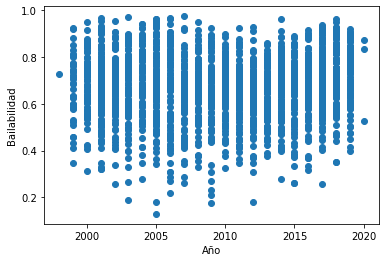

In [20]:
plt.scatter(x,y)
plt.xlabel('Año')
plt.ylabel('Bailabilidad')

Text(0, 0.5, 'Energía')

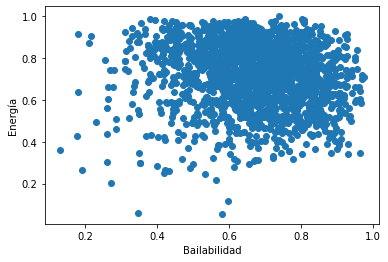

In [21]:
plt.scatter(x1,y1)
plt.xlabel('Bailabilidad')
plt.ylabel('Energía')

Text(0, 0.5, 'Popularidad')

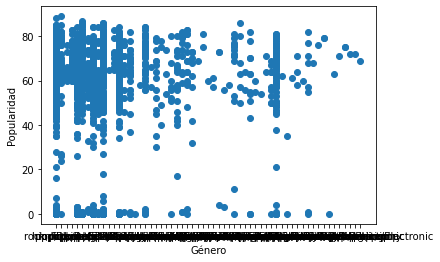

In [22]:
plt.scatter(x2,y2)
plt.xlabel('Género')
plt.ylabel('Popularidad')

#plt.xticks(rotation=90)

### **Histogramas**


1.   Popularidad de las canciones



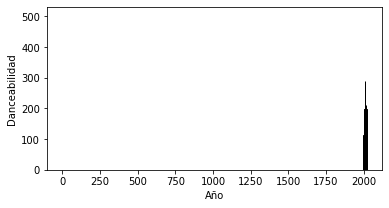

In [23]:
fig,ax = plt.subplots(figsize = (6,3))

ax.hist(y, ec = 'white')
ax.hist(x, ec = 'black')
plt.xlabel('Año')
plt.ylabel('Danceabilidad')
plt.show()

2.   Energía y bailabilidad de las canciones


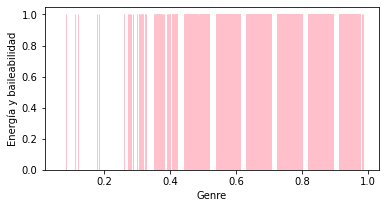

In [24]:
fig,ax = plt.subplots(figsize = (6,3))

ax.hist(y1, ec = 'pink')
plt.xlabel('Genre')
plt.ylabel('Energía y baileabilidad')
plt.show()

### **Boxplot**

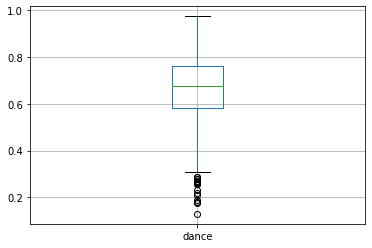

In [25]:
boxplot1 = dataset.boxplot(column = ['dance'])
boxplot1.plot()
plt.show()

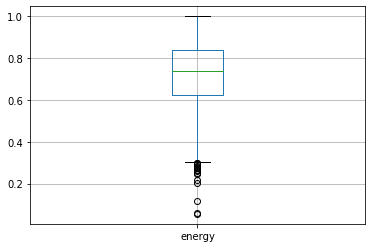

In [26]:
boxplot2 = dataset.boxplot(column = ['energy'])
boxplot2.plot()
plt.show()

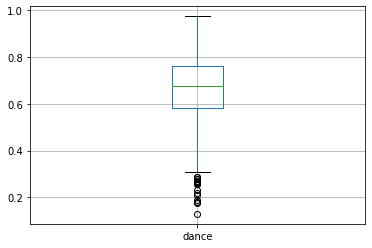

In [27]:
boxplot3 = dataset.boxplot(column = ['dance'])
boxplot3.plot()
plt.show()

### **Mapa de calor**

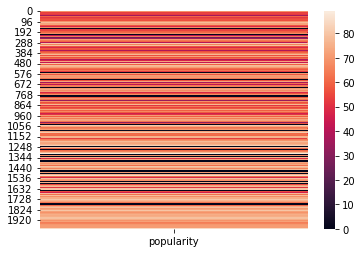

In [28]:
sns.heatmap(spotinum[['popularity']])

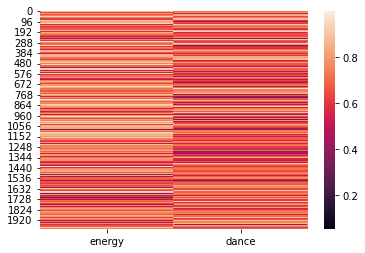

In [29]:
sns.heatmap(ed)

### **Preguntas acerca de análisis de variables**

**¿Hay alguna variable que no aporta información?**
Creo que la variable con el nombre de la canción (*song*) pudimos no incluirla y no afectaría al análisis. Si lo pensamos, los nombres de las canciones no se van a repetir, lo que significa que tendríamos 2000 datos diferentes y no creo que sirva mucho analizarlo.


**Si tuvieras que eliminar variables, ¿Cuáles quitarías y por qué?**
En este proyecto en específico, hubiera sido posible eliminar la variable de *song* que da el nombre de la canción que se analiza. Esta variable no es necesaria para ninguna de nuestras comparaciones ni tablas, y aunque podría resultar importante para distinguir un dato en específico, no llega a utilizarse en este proyecto de análisis.


**¿Existen variables que tengan datos extraños?**
Todas las variables tienen elementos predecibles, excepto por una: **género**. En esta variable, podemos encontrar datos como “pop”, “rock” y “punk”, pero igualmente algunos ejemplos de géneros combinados, incluyendo “pop, rock”, “electrónica, pop” y “rock, punk”, que hicieron mucho más complicado el análisis en el que comparábamos esta variable con otras.

**Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?**
Aún con la naturaleza compleja de nuestros datos cualitativos, los cuantitativos se encontraban en rangos similares. Esto fue perfecto para algunas de nuestras comparaciones, por ejemplo entre *año* y *bailabilidad*, porque pudimos encontrar la correlación entre ambos sin cambiar en absoluto los datos.

**¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son éstos?**
Los grupos de datos que más se parecen son *bailabilidad* y *energía*. Esto se debe a que las dos variables se miden con un índice que va del 0 al 1, y permiten una comparación más comprensiva, lo cual hace que su interpretación sea más sencilla de realizar.
